<a href="https://colab.research.google.com/github/jaehc/py_practice/blob/master/Copy_of_Plot_small_multiple_images_together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 하나의 이미지로 여러 개의 작은 이미지 동시에 출력하기 (텐서의 Transpose 연산)


코세라에 있는 엔드류 응 교수님의 딥러닝 강좌 중에 보면 여러 개의 작은 MNIST 이미지, 즉 숫자 이미지들을 하나의 큰 이미지로 합쳐서 출력하는 예제가 있다. 여러 개의 이미지 샘플을 눈으로 확인할 때 유용하다. 

이 과정에서 4차원의 텐서(Tensor), 즉 4차원 배열을, 다루게 되는데, 텐서 조작을 위해서 reshape, transpose를 사용한다. 때문에 해당 사례는 4차원의 텐서에서 해당 연산의 동작을 연습하기에 더 없이 좋은 예제가 아닐까 한다. 예제에서 사용하는 4차원의 텐서는 shape은 (이미지 행번호, 이미지 열번호, 이미지 세로 pixel 좌표, 이미지 가로 pixel 좌표) 이다. 여기서 이미지 행번호와 이미지 열번호는 여러 작은 이미지를 모아서 출력할 때, Grid 레이아웃을 만드는 데, 거기서의 행번호와 열번호이다.

참고로 2차원의 텐서, 즉 2차원 배열은 우리에게 친숙한 행렬 (Matrix) 이라고도 부르는데, 즉 행렬은 텐서의 특수한 경우라 볼 수 있다. 아무튼 3차원을 넘어가는 텐서를 다루는 게 좀 생소한데, 특히 4차원 이상의 텐서를 transpose를 하면 많이 헷깔린다.

뭐 익숙해지면 별 거 아니겠지만, 여튼간 볼 때마다 새롭고, 잊을 만 하면 나오는 거라 이번에 해당 사례를 정리해볼까 한다.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

scikit-learn을 이용하여 mnist 데이터를 가져온다. 가져온 mnist는 두 개의 텐서로 이루어져 있는데, mnist.data 텐서는 (70000, 784)로 2차원 텐서이고, mnist.target은 (70000,)로 1차원 텐서이다. 

참고로 (70000,) 이라는 표현은 파이썬에서 사이즈 1짜리 Tuple의 값을 지정하거나 출력할 때 사용한다. 예를 들어 (1,2)는 element가 2개 짜리 Tuple, (1,2,3)은 3개 짜리이고, (1,)은 하나 짜리인 것이다. 

그러면 왜 (1,) 라는 노테이션을 쓸까? 그 이유는 만약 (1) 이라고 한다면 그것은 Python 인터프리터에 의해 숫자 1로 해석되고 Tuple로 해석되지 않기 때문이다. 즉, 숫자 타입의 1과 크기 1짜리 Tuple을 구분하기 위함이다. 


In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


가져온 mnist 데이터에서 샘플로 100개의 인스턴스를 가져오자. 그 결과는 shape가 (100,784)인 텐서가 되는데, 이 것을 reshape 명령어를 통해서 shape가 (M, 28, 28)인 텐서로 전환할 수 있다. 참고로 reshape은 데이터를 바라보는 View만 변경할 뿐, 실제로 데이터를 옮기는 연산을 하지 않는다. 아래에 나올 transpose의 경우도 마찬가지이다.

두번째 명령어에서 trainX를 reshape할 시에 (-1, 28, 28)로 첫번째 Axis의 차원의 크기를 -1로 지정했는데, 이렇게 하면 Numpy가 자동으로 해당 Axis의 차원 크기를 결정해준다. 어떤 값을 사용할 지는 data buffer에 저장되어 있는 형태와 원하는 결과 shape에 따라 좌우된다. [Numpy에서 Buffer와 shape의 관계](https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r/22074424)

세번째 명령어는 각 이미지를 (28, 28) 텐서로 만든 것을 다시 (784,)로 만들어 주고, transpose를 한다. 그 결과 row 방향으로는 784개의 이미지 pixel이 나열되고, column 방향으로는 이미지 인스턴스가 나열된다.

In [ ]:
trainX = mnist.data[:100]
print('trainX.shape: ', trainX.shape)

trainX2d = trainX.reshape(-1, 28, 28)
print('trainX2d.shape: ', trainX2d.shape)

trainX1d = trainX2d.reshape(-1, 28*28).transpose()
print('trainX1d.shape: ', trainX1d.shape)

trainY = mnist.target[:100]
print ('trainY.shape: ', trainY.shape)

trainY1d = trainY.reshape(1,-1)
print ('trainY1d.shape: ', trainY1d.shape)

trainX.shape:  (100, 784)
trainX2d.shape:  (100, 28, 28)
trainX1d.shape:  (784, 100)
trainY.shape:  (100,)
trainY1d.shape:  (1, 100)


첫번째 이미지를 테스트 삼아서 출력해보자. mnist는 각 pixel값이 0-255값을 가지는 gray image로 matplotlib에서 imshow로 이미지를 출력할 때 cmap을 'gray'로 지정한다. 

img2d.shape:  (28, 28)


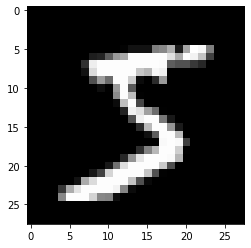

In [ ]:
img2d = trainX2d[0,:,:]
print ('img2d.shape: ', img2d.shape)
plt.imshow(img2d, cmap='gray');

trainX1d는 (784, 100)의 shape을 가지고 있는데 이를 (28,28,10,10)으로 reshape을 한다. 

먼저 앞부분 두 개의 component 28, 28은 이미지의 가로와 세로를 나타내고, 
뒷부분 두 개의 component 10,10은 출력 Grid 이미지에서 가로와 세로의 이미지 수를 나타낸다. 

In [ ]:
trainX2d_before_transpose = trainX1d.reshape(28,28,10,10)
print (trainX2d_before_transpose.shape)

(28, 28, 10, 10)


이제 shape이 (28,28,10,10)인 텐서를 transpose해보자. 


transpose에 전달하는 숫자값의 의미는 원래 텐서의 Axes의 번호를 말한다. 그리고 함수 호출 시에 나열한 인자의 순서에 따라서 transpose한 후의 구조가 결정된다. 아래의 경우엔 transpose(2,0,3,1)을 호출했는데, 그러면 다음과 같이 텐서의 shape이 변경된다.

변경 전 shape은 (28, 28, 10, 10) => transpose(2,0,3,1) => 변환 후 shape은 (10, 28, 10, 28)
* 1번째 Axe -> 2번째 Axe
* 2번째 Axe -> 4번째 Axe
* 3번째 Axe -> 1번째 Axe
* 4번째 Axe -> 3번째 Axe


Transpose 결과를 이해하기 위해서 먼저 간단한 matrix의 transpose를 살펴보자. 

다음과 같이 matrix가 있다고 가정하자. 참고로 Matrix에서 행은 열보다 앞에 있는 Axes이다. 행은 Axes 번호가 0이고, 열은 1이다. transpose를 하게 되면 하나의 열에 해당하는 행들은 해당 열의 하위로 들어가게 된다. 그리고 열들은 자신에게 속한 행들을 가지고 첫번째 Axes로 가기 때문에 결과 Matrix에서 행이 된다. 

\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{pmatrix}

transpose 이후,

\begin{pmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{pmatrix}



마찬가지로, 위의 이미지 Grid 예제에서 transpose 이후 Axes의 순서가 바뀌게 되면, 기존에 앞에 있던 Axes의 모든 좌표들이 뒤에 있던 Axes의 각각 하나의 component 안으로 모두 들어가게 되고, 뒤에 있던 Axes의 각 component들은 앞에 있던 Axes의 완전한 세트를 가지게 된다. 이 때, swap이 되는 Axes를 제외한 다른 Axes들의 순서는 그대로 유지된다. 

따라서, 결과적으로, (10, 28, 10, 28) 텐서는 먼저 세로로 이미지 Grid의 행들이 나열되면서, 각 행들에는 이미지의 세로 Pixel의 전체 component의 범위가, 즉 0에서 255까지, 반복적으로 나열되게 되어, 그 결과 10 * 28개의 pixel이 만들어지게 된다. 그리고 세로로 만들어진 10 * 28개의 pixel의 한 점마다 하위에 (10, 28)의 텐서가 존재하는데, 이는 가로로 이미지 Grid의 행들이 나열되면서, 각 열들에는 이미지의 가로 Pixel의 전체 Component의 범위가 반복적으로 나열되게 된다. 

이런식으로 (28,28,10,10)의 텐서의 좌표는 (10,28,10,28)의 좌표로 바뀌게 된다.



In [ ]:
trainX2d_gridlayout = trainX2d_before_transpose.transpose(2,0,3,1)
print (trainX2d_gridlayout.shape)

(10, 28, 10, 28)


마지막으로 (10,28,10,28) 텐서에서 Grid 이미지의 세로 방향에 해당하는 첫번째와 두번째 차원을 합쳐준다. 위에서 언급한 대로 세로로 이미지가 번갈아서 좌표가 설정되었기 때문에 두 차원을 합쳐주면 이미지가 세로로 번갈아서 나온다. 마찬가지로 reshape의 두번째 인자에 -1을 지정해 가로 방향으로도 차원을 합쳐준다. 

In [ ]:
grid_img = trainX2d_gridlayout.reshape(28*10,-1)
print (grid_img.shape)

(280, 280)


결과 이미지가 출력해보자. 간단한 좌표변환으로 이와 같은 일을 할 수 있다는 것이 흥미롭다. Grid 이미지를 생성하는 데 루프를 전혀 이용하지 않았다. transpose를 이용하지 않고 Naive하게 구현했다면 아마도 네 개의 for-loop 중첩을 사용하여 이미지를 생성했을 것이다. 

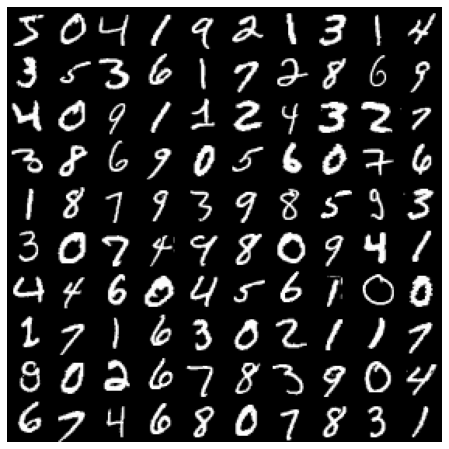

In [ ]:
plt.figure(figsize = (8,8));
plt.axis('off');
plt.imshow(grid_img, cmap='gray');

다음은 for-loop를 이용하여 수동으로 transose를 구현한 것이다. 위의 transpose 함수를 이용할 때 사용한 Axes간의 맵핑이 인덱스 변수 p,q,i,j를 통해서 그대로 적용된다. 

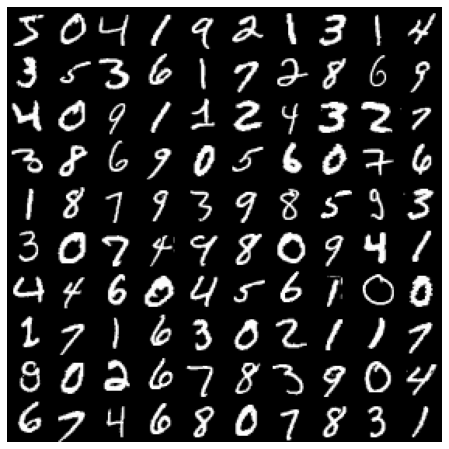

In [ ]:
grid_img = np.zeros((10*28,10*28))
for p in range(28):
    for q in range(28):
        for i in range(10):
            for j in range(10):
                grid_img[i*28+p,j*28+q] = trainX2d_before_transpose[p,q,i,j]

                
grid_img = grid_img.reshape(10*28,-1)
plt.figure(figsize = (8,8));
plt.axis('off');
plt.imshow(grid_img, cmap='gray');